In [1]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV
import numpy as np
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
import seaborn as sns
import sys
import pickle
sys.path.append('/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions')
from Evaluation import *
from Preparation import *

In [2]:
X, y, data = preparation_class_threshold()

/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions/Preparation.py:717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv('../../Dataset/Location.csv')


### Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

### Trainning Baseline

Best parameters: {'n_estimators': 100}
Best score:  0.5956171389637566
-------------------------------------------------------------
Evaluation
Average training score:  0.6784813710210827
Average validation score:  0.5956171389637566
Accuracy:  0.5995602022542926
Precision:  0.4987728633488643
Recall:  0.5995602022542926
F1-Score:  0.5103608928967741
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.13      0.02      0.03      1166
   Minor injury       0.16      0.02      0.04     10409
Property damage       0.38      0.13      0.19     17442
 Serious injury       0.63      0.92      0.75     46927

       accuracy                           0.60     75944
      macro avg       0.32      0.27      0.25     75944
   weighted avg       0.50      0.60      0.51     75944



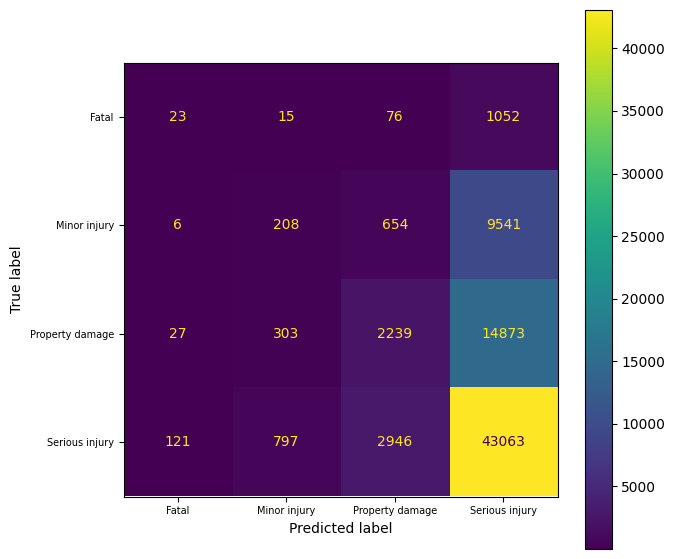

In [10]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'n_estimators': [100]
}
grid_search = GridSearchCV(model, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_baseline = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/rf_baseline.pkl', 'wb') as file:
    pickle.dump(model_baseline, file)

In [4]:
pipeline_smote = make_imb_pipeline(SMOTE(random_state=42), RandomForestClassifier(random_state=42, n_jobs=-1))
pipeline_smoteen = make_imb_pipeline(SMOTEENN(random_state=42), RandomForestClassifier(random_state=42, n_jobs=-1))
pipeline_tomek = make_imb_pipeline(SMOTETomek(random_state=42), RandomForestClassifier(random_state=42, n_jobs=-1))
pipeline_under = make_imb_pipeline(RandomUnderSampler(random_state=42), RandomForestClassifier(random_state=42, n_jobs=-1))

### SMOTE

Best parameters: {'randomforestclassifier__n_estimators': 100}
Best score:  0.39893803095132974
-------------------------------------------------------------
Evaluation
Average training score:  0.5020434611109847
Average validation score:  0.39893803095132974
Accuracy:  0.38761455809543877
Precision:  0.5092538559856992
Recall:  0.38761455809543877
F1-Score:  0.4196053299787808
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.06      0.26      0.09      1166
   Minor injury       0.18      0.36      0.24     10409
Property damage       0.32      0.41      0.36     17442
 Serious injury       0.66      0.39      0.49     46927

       accuracy                           0.39     75944
      macro avg       0.31      0.35      0.30     75944
   weighted avg       0.51      0.39      0.42     75944



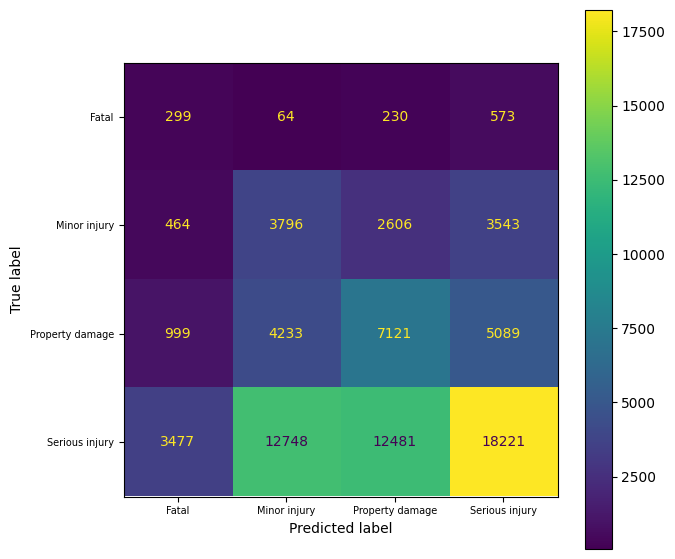

In [5]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'randomforestclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_rf = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/rf_smote.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

### Undersampling

Best parameters: {'randomforestclassifier__n_estimators': 100}
Best score:  0.2859856622992903
-------------------------------------------------------------
Evaluation
Average training score:  0.3055231796868245
Average validation score:  0.2859856622992903
Accuracy:  0.2833666912461814
Precision:  0.48848027255281207
Recall:  0.2833666912461814
F1-Score:  0.3179144158371451
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.04      0.59      0.08      1166
   Minor injury       0.17      0.38      0.24     10409
Property damage       0.29      0.34      0.32     17442
 Serious injury       0.64      0.23      0.34     46927

       accuracy                           0.28     75944
      macro avg       0.29      0.39      0.24     75944
   weighted avg       0.49      0.28      0.32     75944



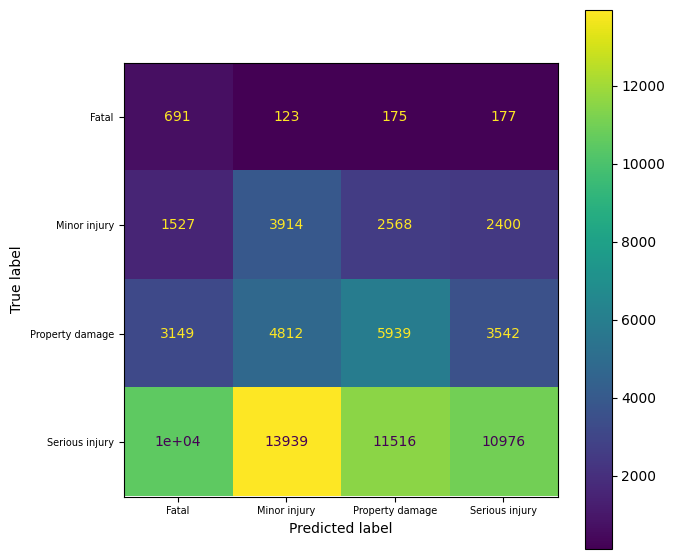

In [7]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'randomforestclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_under, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_under = grid_search.best_estimator_
cv_results = grid_search.cv_results_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/rf_undersampling.pkl', 'wb') as file:
    pickle.dump(model_under, file)

### SMOTEENN

Best parameters: {'randomforestclassifier__n_estimators': 100}
Best score:  0.3625030569739812
-------------------------------------------------------------
Evaluation
Average training score:  0.4091536795288778
Average validation score:  0.3625030569739812
Accuracy:  0.351403665859054
Precision:  0.5045795341063136
Recall:  0.351403665859054
F1-Score:  0.40570763091083917
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.03      0.40      0.05      1166
   Minor injury       0.17      0.26      0.21     10409
Property damage       0.32      0.21      0.25     17442
 Serious injury       0.66      0.42      0.52     46927

       accuracy                           0.35     75944
      macro avg       0.29      0.32      0.26     75944
   weighted avg       0.50      0.35      0.41     75944



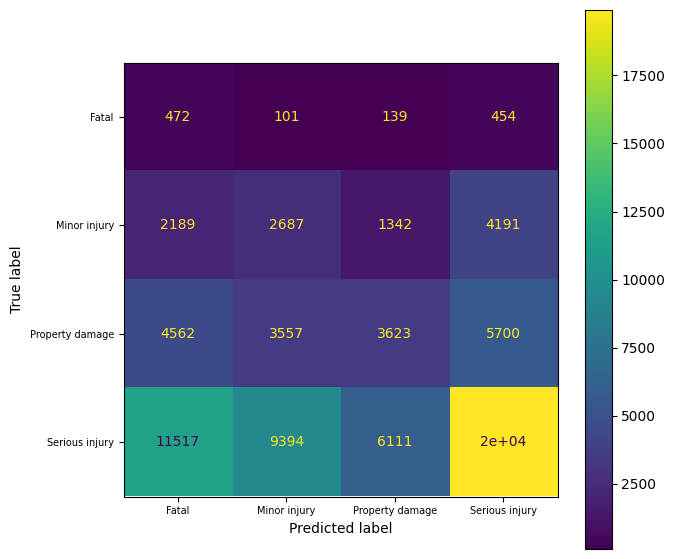

In [8]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'randomforestclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smoteen, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smoteenn = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/rf_smoteenn.pkl', 'wb') as file:
    pickle.dump(model_smoteenn, file)

### SMOTE TOMEK

Best parameters: {'randomforestclassifier__n_estimators': 100}
Best score:  0.3990795775601626
-------------------------------------------------------------
Evaluation
Average training score:  0.502154564578109
Average validation score:  0.3990795775601626
Accuracy:  0.3881149267881597
Precision:  0.5088876716029044
Recall:  0.3881149267881597
F1-Score:  0.4200132874026698
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.06      0.25      0.09      1166
   Minor injury       0.18      0.36      0.24     10409
Property damage       0.32      0.41      0.36     17442
 Serious injury       0.66      0.39      0.49     46927

       accuracy                           0.39     75944
      macro avg       0.30      0.35      0.30     75944
   weighted avg       0.51      0.39      0.42     75944



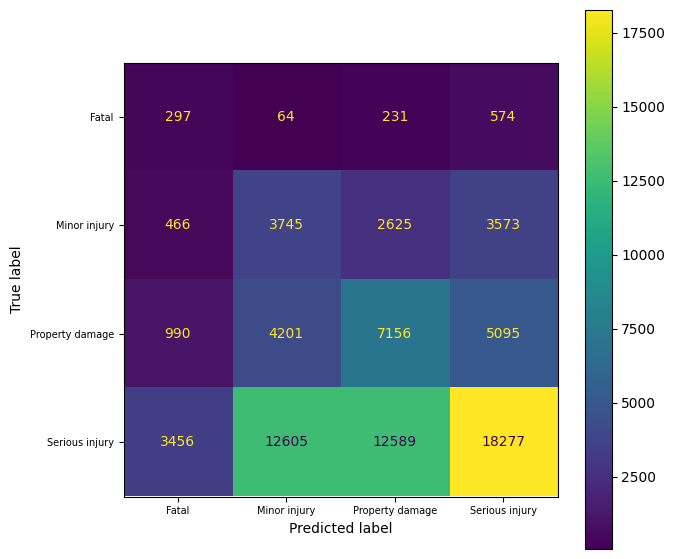

In [9]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'randomforestclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_tomek, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_tomek = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/rf_tomek.pkl', 'wb') as file:
    pickle.dump(model_tomek, file)

In [3]:
print(297/1166)
print(3745/10409)
print(7156/17442)
print(18277/46927)

0.25471698113207547
0.3597848016139879
0.4102740511409242
0.38947727321158393
